### <b>Recurrent Neural Network for regression problem - RNN</b>

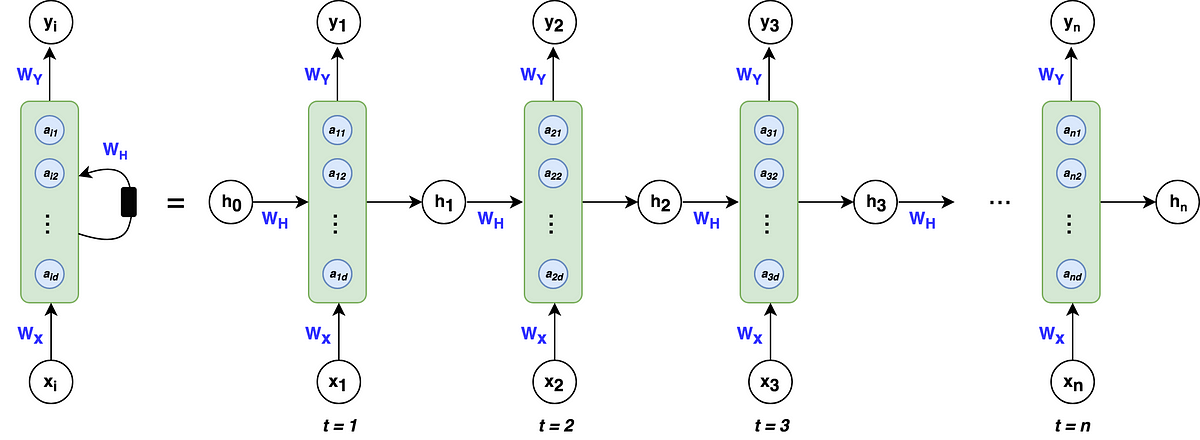
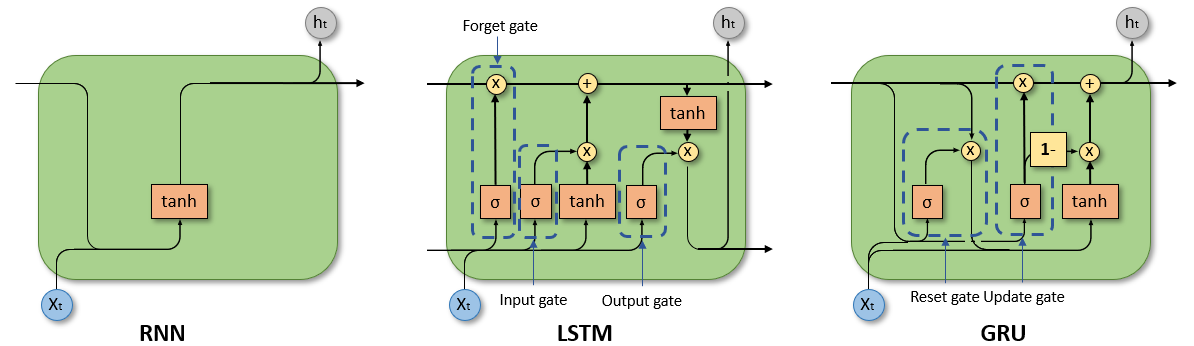
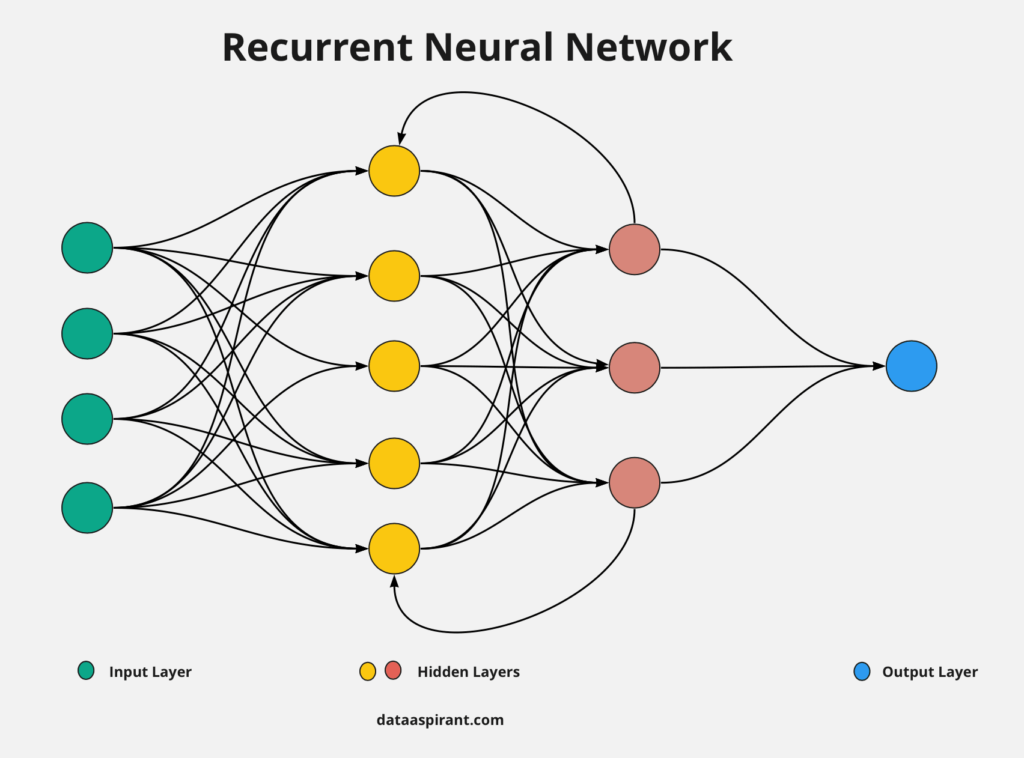
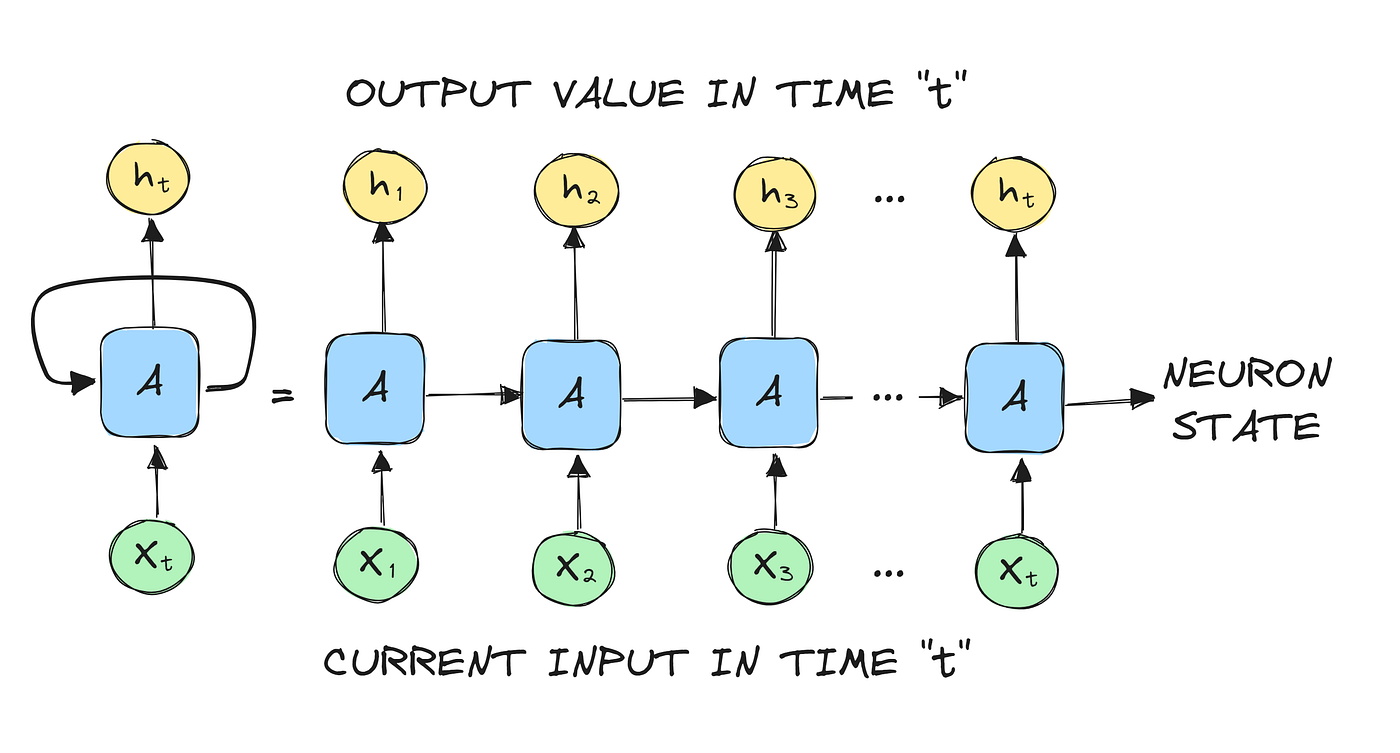
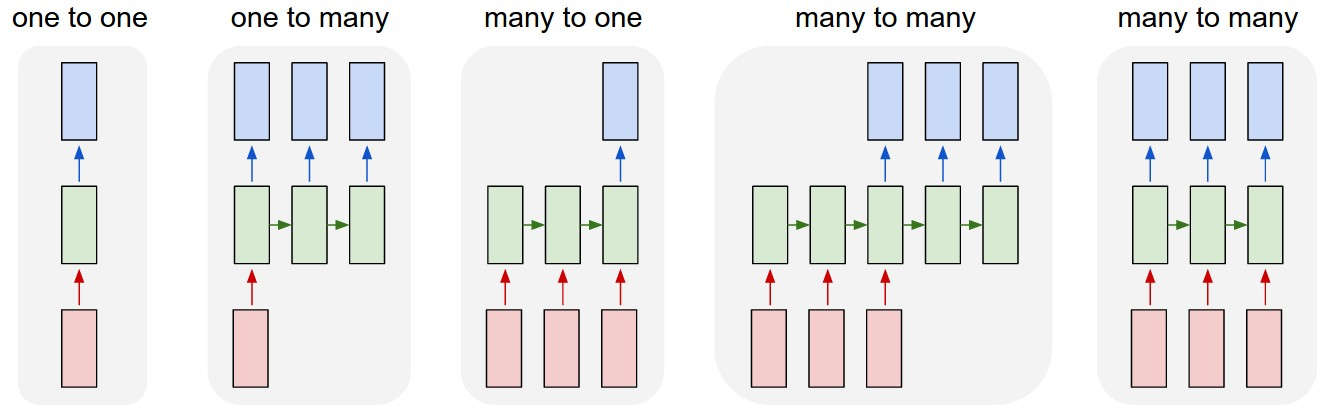
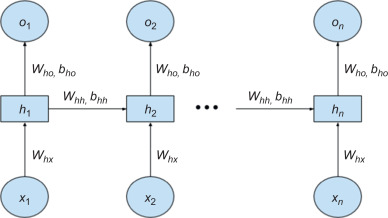
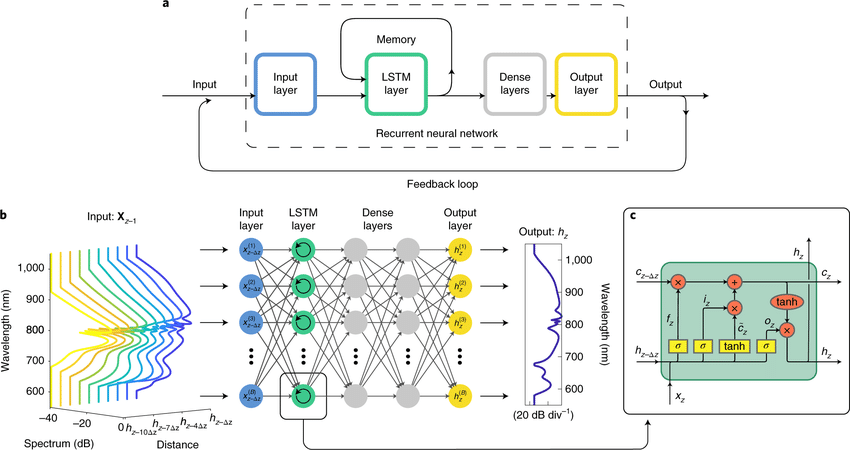
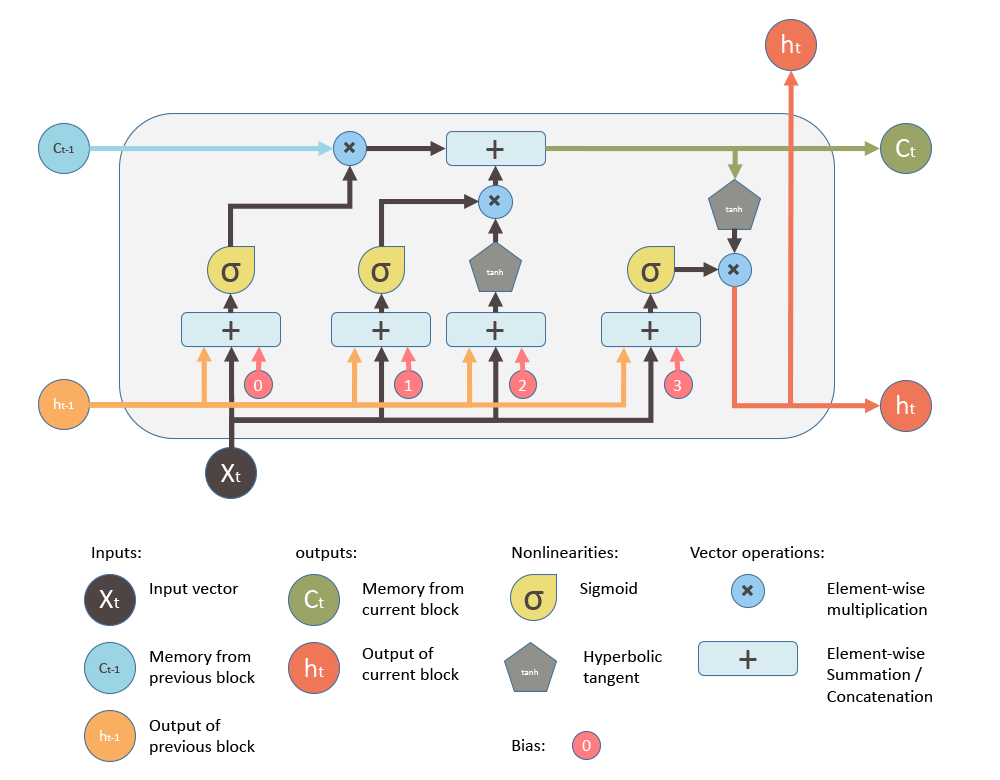
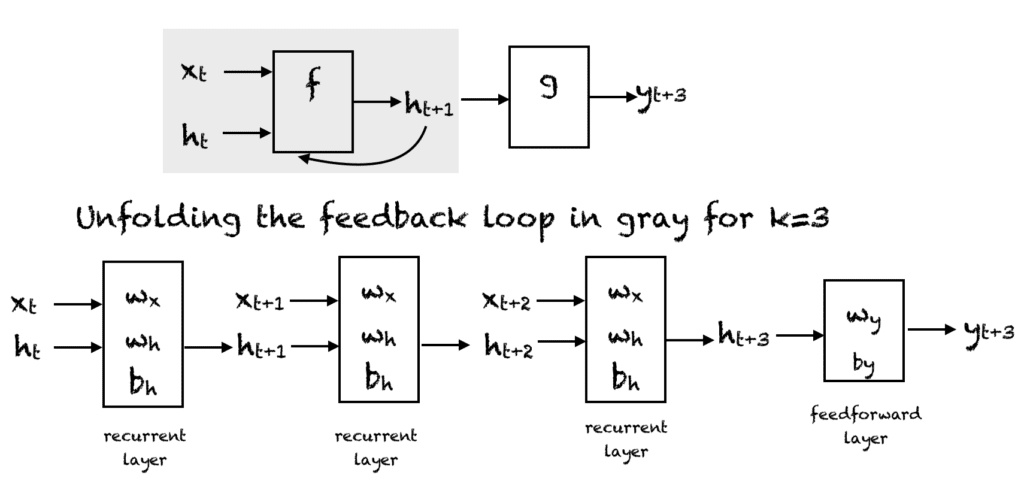
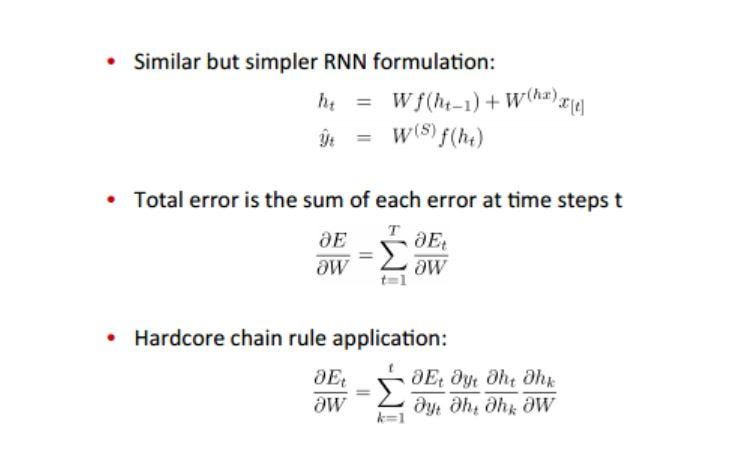
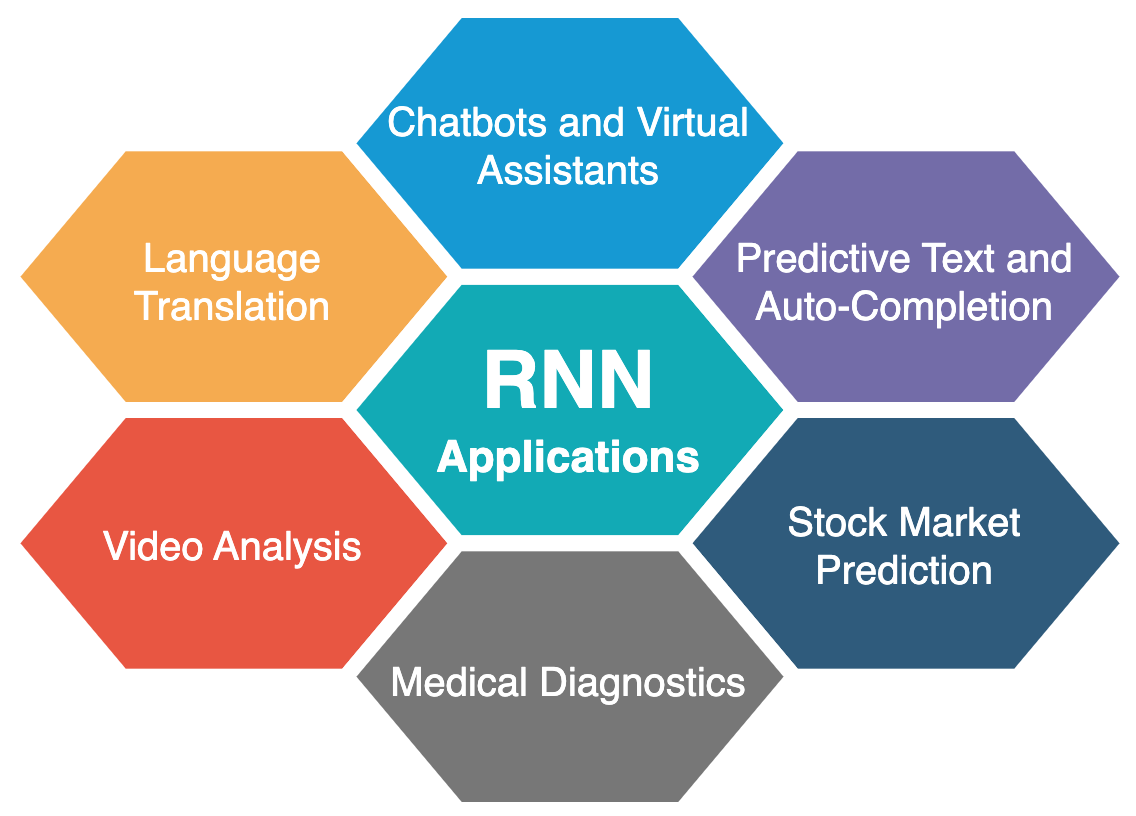

### <b>1. Importing/loading libraries</b>

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

### <b>2. Data preprocessing</b>

#### <b>2.1 Data loading</b>

In [145]:
dataset_training = pd.read_csv("Google_Stock_Price_Train.csv")

print(f"Dataset training: \n{dataset_training}\n")

training_set = dataset_training.iloc[:, 1:2].values

print(f"Training set: \n{training_set}\n")


Dataset training: 
            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]

Training set: 
[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]



#### <b>2.2 Feature scaling</b>

In [146]:
min_max_scaler = MinMaxScaler(feature_range = (0, 1))
min_max_scaler.fit(training_set)

training_set = min_max_scaler.transform(training_set)

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set[i-60:i, 0])
    y_train.append(training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

print(f"X_train: \n{X_train}\n")
print(f"y_train: \n{y_train}\n")

X_train: 
[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]

y_train: 
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]



In [147]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(f"X_train: \n{X_train}\n")

X_train: 
[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]



### <b>3. Fitting/creating Recurrent Neural Network Model for Regression</b>

#### <b>3.1 Creating RNN model</b>

In [148]:
regressor = tf.keras.models.Sequential()

# First LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(
    units = 50, return_sequences = True,
    input_shape = (X_train.shape[1], 1)
))
regressor.add(tf.keras.layers.Dropout(0.2))

# Second LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(
    units = 50, return_sequences = True
))
regressor.add(tf.keras.layers.Dropout(0.2))

# Third LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(
    units = 50, return_sequences = True
))
regressor.add(tf.keras.layers.Dropout(0.2))

# Fourth LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(
    units = 50
))
regressor.add(tf.keras.layers.Dropout(0.2))

# Output/last layer
regressor.add(tf.keras.layers.Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.summary()

c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

#### <b>3.2 Fitting the Recurrent Neural Network to the Training set</b>

In [149]:
regressor.fit(X_train, y_train, epochs=100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.1031
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0081
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0057
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0049
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0045
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0042
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0051
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0051
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0050
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0044
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0043
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0040
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0041
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0045
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - lo

### <b>4. Evaluating the performance of RNN model for Regression Problem</b>

In [150]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

print(f"Real stock price: \n{real_stock_price}\n")

Real stock price: 
[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]



In [151]:
dataset_total = pd.concat((dataset_training['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = min_max_scaler.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)

print(f"Predicted stock price: \n{predicted_stock_price}\nrleg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
Predicted stock price: 
[[783.5224 ]
 [780.78754]
 [780.3088 ]
 [781.2316 ]
 [784.1356 ]
 [789.5363 ]
 [795.0712 ]
 [798.06305]
 [798.92175]
 [798.7134 ]
 [798.2375 ]
 [797.7644 ]
 [797.4687 ]
 [797.8684 ]
 [798.80096]
 [802.7985 ]
 [809.2554 ]
 [816.65936]
 [821.48975]
 [819.0847 ]]
rleg


#### <b>5. Visualizing the results<b>

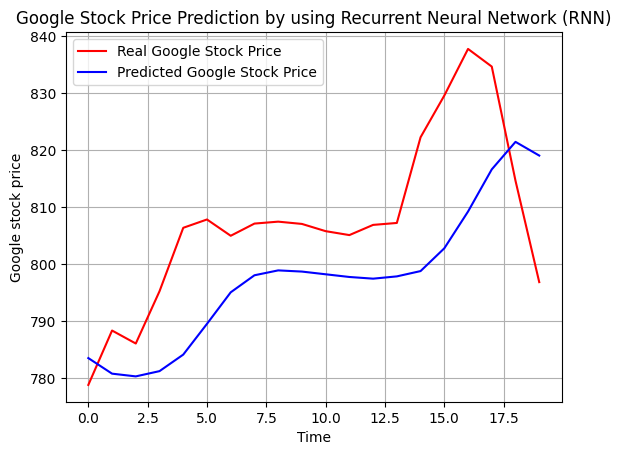

In [154]:
plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction by using Recurrent Neural Network (RNN)")
plt.xlabel("Time")
plt.ylabel("Google stock price")
plt.legend()
plt.grid(True)
plt.show()